In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import sympy as sp

# Step 1: Load the Iris dataset and select only 2 classes (Setosa and Versicolor)

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Select only the Setosa and Versicolor classes (target 0 and 1)
df = df[df['target'].isin([0, 1])]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


# Step 2: Make pairplot for each feature

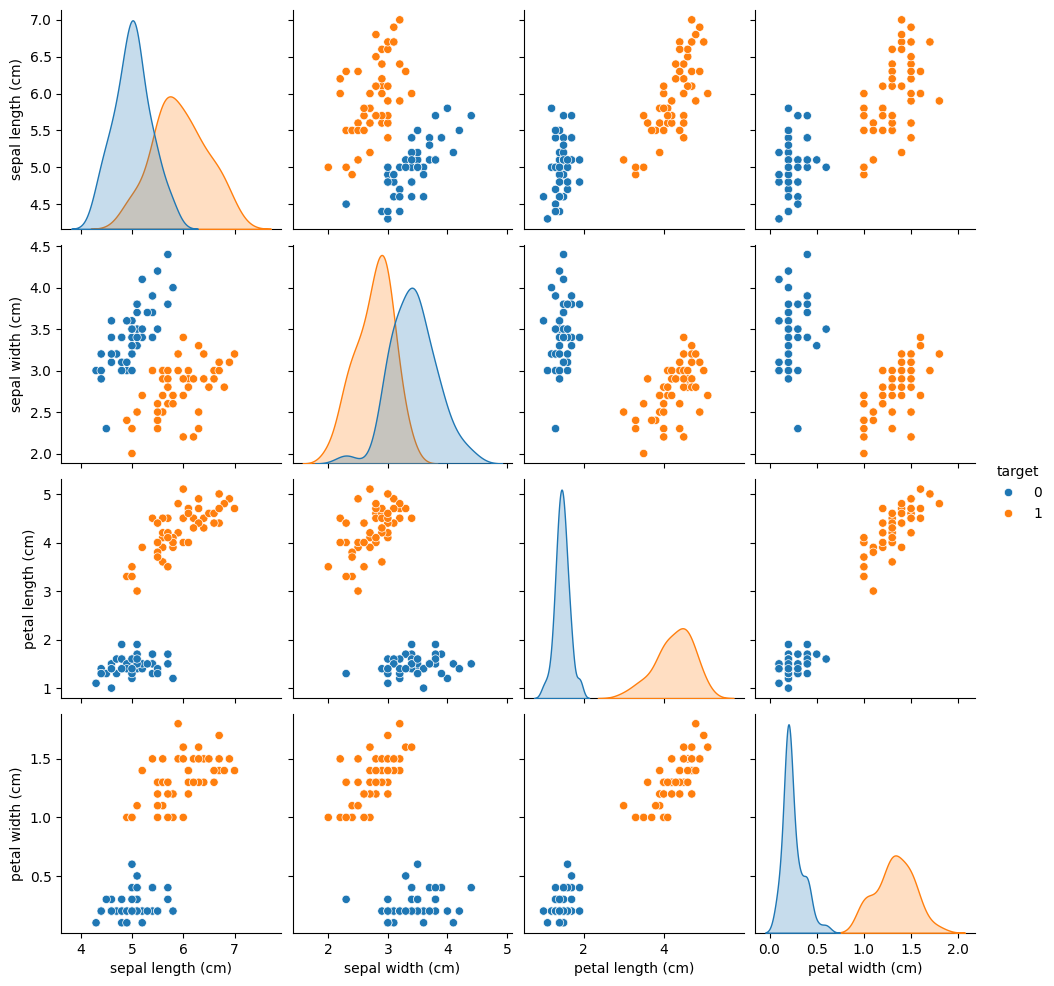

In [3]:
sns.pairplot(df, hue='target', vars=iris.feature_names)
plt.show()

# Step 3: Apply PCA without using sklearn

In [27]:
# Step 3.1: Standardize the data (zero mean, unit variance)
X = df.iloc[:, :-1].values  # Select only the features (remove target)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

pd.DataFrame(X_standardized)

,0,1,2,3
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111
...,...,...,...,...
95,0.358663,-0.207835,0.928390,0.736235
96,0.358663,-0.417770,0.928390,0.914070
97,1.141771,-0.417770,0.997724,0.914070
98,-0.581066,-1.257507,0.096375,0.558401


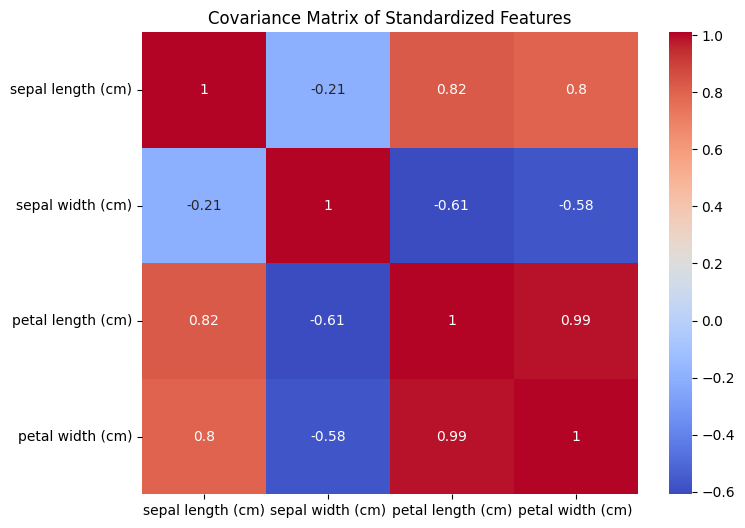

In [14]:
# Step 3.2: Compute the covariance matrix of the standardized data
cov_matrix = np.cov(X_standardized.T)
cov_matrix

# Plot the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title("Covariance Matrix of Standardized Features")
plt.show()

In [23]:
# Step 3.3: Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3.4: Sort the eigenvalues and corresponding eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

In [24]:
# Step 4: Print the eigenvalues and eigenvectors in the desired format
sp.init_printing()  # Enable pretty printing for LaTeX

# Loop through eigenvalues and eigenvectors and print them
for i in range(len(eigenvalues)):
    eigenvalue = sp.symbols(f'lambda_{i+1}')
    eigenvector = sp.Matrix(eigenvectors[:, i])
    
    # Display in format lambda_1 = value, v_1 = vector
    display(sp.Eq(eigenvalue, eigenvalues[i]))  # Eigenvalue
    print(f"v_{i+1} = ")
    display(eigenvector)  # Eigenvector
    print("\n")  # Line break for readability

v_1 = 


⎡-0.478084826668528⎤
⎢                  ⎥
⎢0.370996947488205 ⎥
⎢                  ⎥
⎢-0.566678101953474⎥
⎢                  ⎥
⎣-0.559170897159506⎦

v_2 = 


⎡0.550353813627258 ⎤
⎢                  ⎥
⎢0.832841867775576 ⎥
⎢                  ⎥
⎢0.0319616657437139⎥
⎢                  ⎥
⎣0.049634212282558 ⎦

v_3 = 


⎡0.673865112319963 ⎤
⎢                  ⎥
⎢-0.401490081680108⎥
⎢                  ⎥
⎢-0.290728889782114⎥
⎢                  ⎥
⎣-0.547894366969185⎦

v_4 = 


⎡ 0.120213929031789 ⎤
⎢                   ⎥
⎢-0.0868412491102296⎥
⎢                   ⎥
⎢-0.770279879871826 ⎥
⎢                   ⎥
⎣ 0.620222633724665 ⎦

In [12]:
# Step 3.5: Project the data onto the new feature space (the two principal components)
# Select the top 2 eigenvectors
eigenvectors_reduced = eigenvectors[:, :2]
X_pca = np.dot(X_standardized, eigenvectors_reduced)

# Convert to DataFrame for easier plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df['target'].values

df_pca

,PC1,PC2,target
0,1.746868,0.297225,0
1,1.507200,-0.749381,0
2,1.852017,-0.574307,0
3,1.770430,-0.830914,0
4,1.899632,0.385870,0
...,...,...,...
95,-1.186357,0.090513,1
96,-1.363682,-0.075502,1
97,-1.777364,0.357700,1
98,-0.555588,-1.336301,1


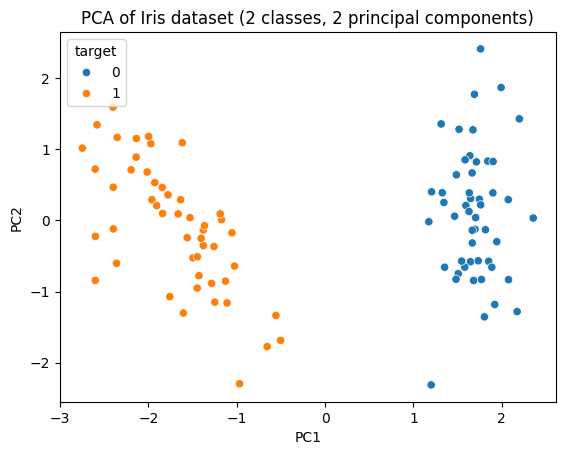

In [13]:
# Plot the reduced 2D data
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca)
plt.title("PCA of Iris dataset (2 classes, 2 principal components)")
plt.show()